<a href="https://colab.research.google.com/github/ArushiShiv/Capstone-Project/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI-BASED TRAFFIC MANAGEMENT SYSTEM:-

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#LOADING DATA

In [ ]:
data = pd.read_csv("traffic.csv")
data.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

#Data Exploration

In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [ ]:
colors =["#2C3E50", "#E74C3C", "#3498DB", "#27AE60"]

Text(0.5, 0, 'Date')

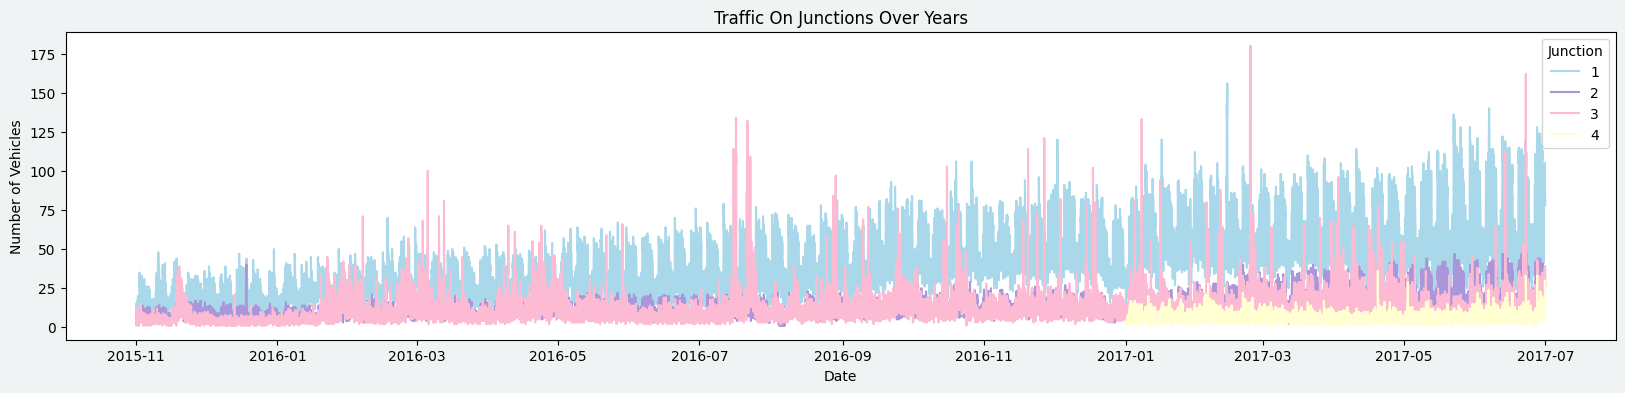

In [ ]:
# df to be used for EDA
df = data.copy()

# Plotting the Timeseries with light pastel colors
pastel_colors = ["#A8D8EA", "#AA96DA", "#FCBAD3", "#FFFFD2"]  # Light blue, lavender, pink, light yellow
plt.figure(figsize=(20, 4), facecolor="#F0F3F4")  # Light gray background
Time_series = sns.lineplot(x=df['DateTime'], y="Vehicles", data=df, hue="Junction", palette=pastel_colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

#Feature Engineering

In [ ]:
#Exploring more features
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

DateTime  Junction  Vehicles  Year  Month  Date_no  Hour     Day
0 2015-11-01 00:00:00         1        15  2015     11        1     0  Sunday
1 2015-11-01 01:00:00         1        13  2015     11        1     1  Sunday
2 2015-11-01 02:00:00         1        10  2015     11        1     2  Sunday
3 2015-11-01 03:00:00         1         7  2015     11        1     3  Sunday
4 2015-11-01 04:00:00         1         9  2015     11        1     4  Sunday

#Exploratory Data Analysis

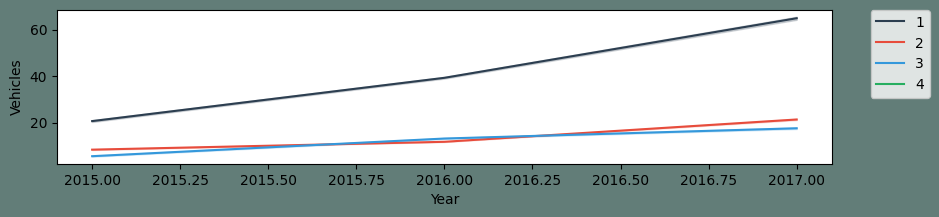

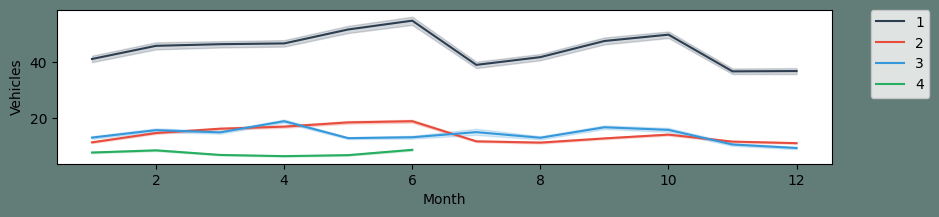

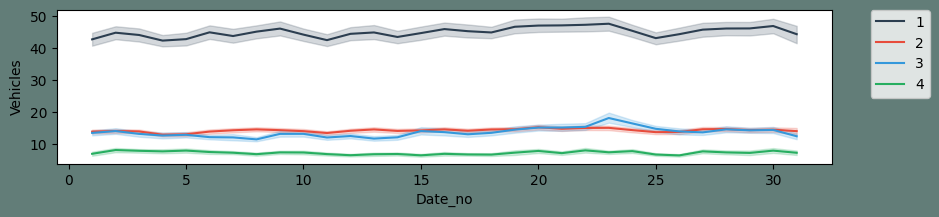

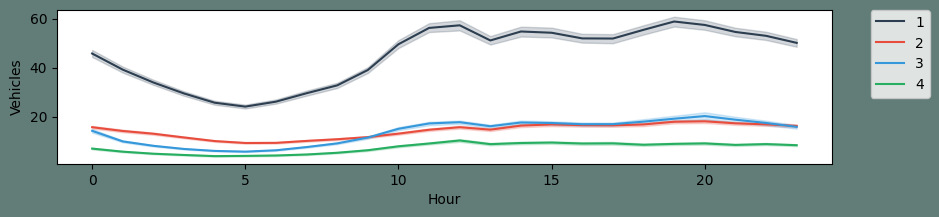

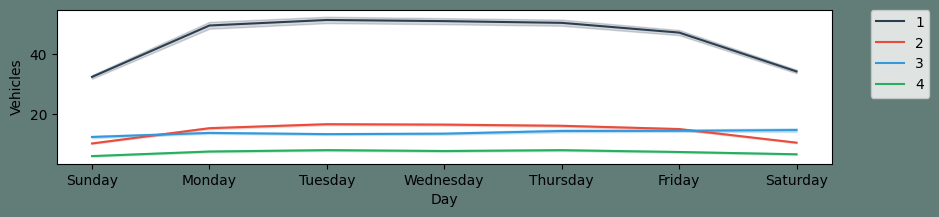

In [ ]:
#Plotting the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

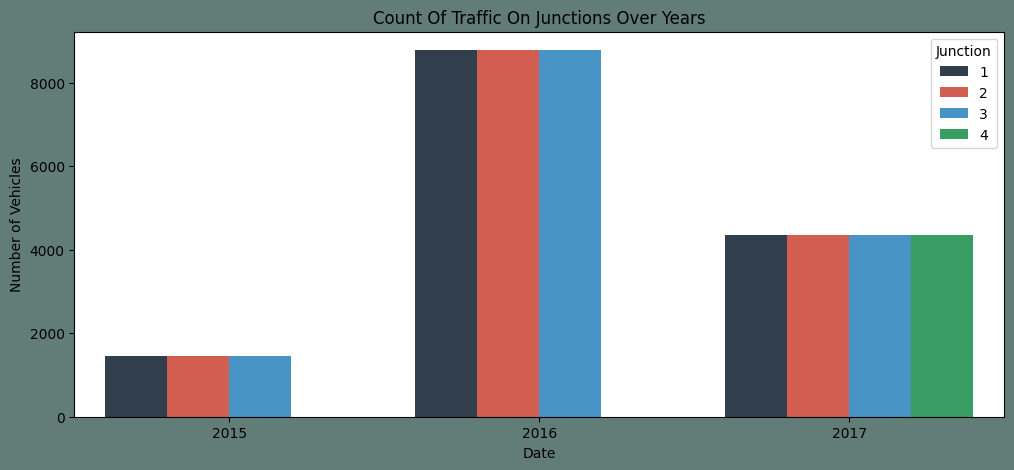

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

In [ ]:
# Load your dataset (modify the path accordingly)
df = pd.read_csv("traffic.csv")  # Replace with your actual dataset path


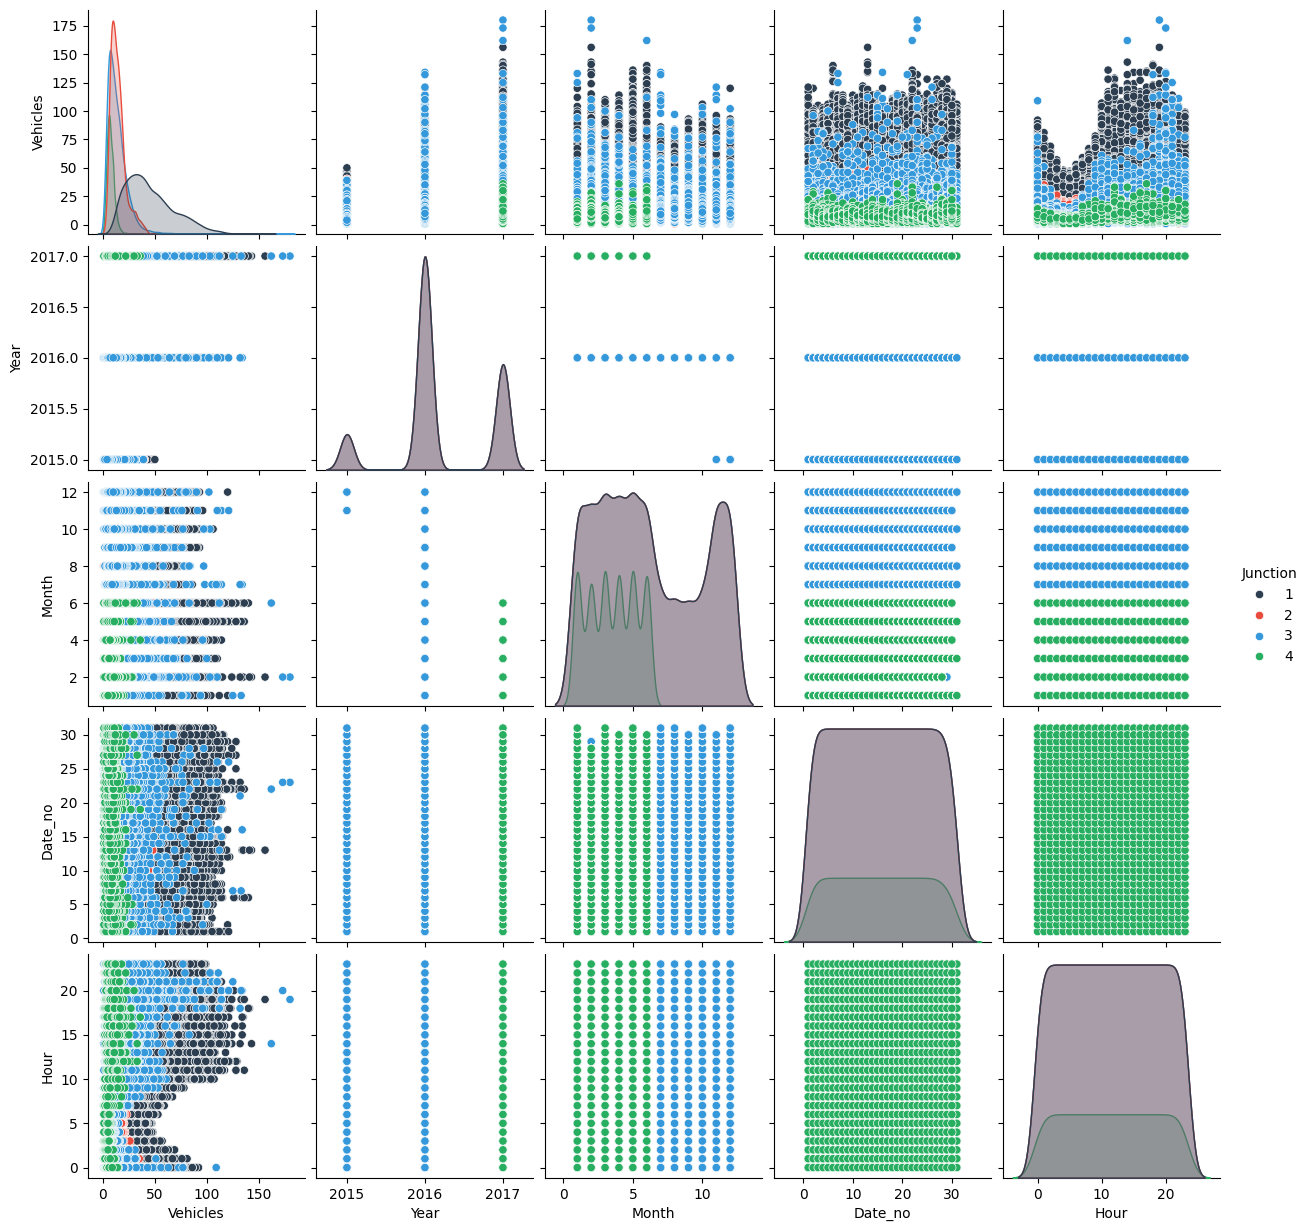

In [ ]:
sns.pairplot(data=df, hue= "Junction",palette=colors)

#DATA TRANSFORMATION AND PREPROCESSING

In [ ]:
#Pivoting data fron junction
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

In [ ]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

In [ ]:
#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


In [ ]:
#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

In [ ]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [ ]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

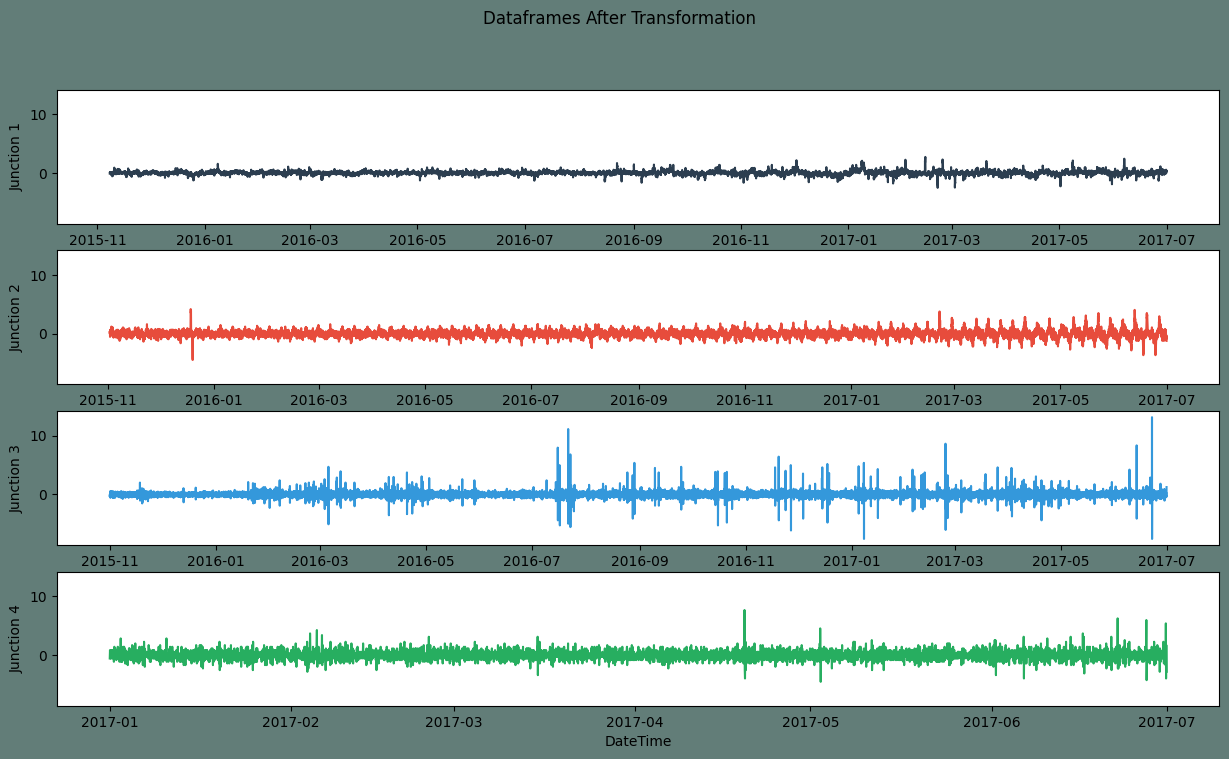

In [ ]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

In [ ]:
#Stationary Check for the time series Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.26530339041543
p-value: 4.798539876396819e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694008
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832607
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305226
p-value: 2.7787875325955e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [ ]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

#ENHANCED FEATURES

In [ ]:
# df to be used for EDA
# df to be used for EDA
df = data.copy()

# Create a more sophisticated visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects  # Correct import for path_effects
import numpy as np
from scipy.interpolate import make_interp_spline

# Set the style for a professional look
plt.style.use('dark_background')

# Create custom color map for the visualization
colors = ["#FF6B6B", "#48DBFB", "#1DD1A1", "#F368E0"]
cmap_name = 'custom_traffic_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

# Create a new figure with a specific size and high DPI for crispness
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12), dpi=150, gridspec_kw={'height_ratios': [3, 1]})
fig.patch.set_facecolor('#0A0A0A')

# Get unique junctions
junctions = df['Junction'].unique()

# Create a dictionary to store smoothed data for each junction
smooth_data = {}

# For each junction, create a smoothed line
for i, junction in enumerate(junctions):
    junction_data = df[df['Junction'] == junction]

    # Sort by datetime to ensure proper line plotting
    junction_data = junction_data.sort_values('DateTime')

    # Get x and y data
    x = mdates.date2num(junction_data['DateTime'])
    y = junction_data['Vehicles'].values

    # Create smooth line using spline interpolation
    if len(x) > 3:  # Need at least 4 points for cubic spline
        x_smooth = np.linspace(x.min(), x.max(), 500)
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_smooth)
        smooth_data[junction] = (x_smooth, y_smooth)
    else:
        smooth_data[junction] = (x, y)

    # Plot the smooth line with shadow effect
    color = colors[i % len(colors)]

    # Create gradient line effect
    for j, alpha in zip(range(5), [0.1, 0.2, 0.3, 0.4, 0.8]):
        line_width = 6 - j
        ax1.plot(mdates.num2date(smooth_data[junction][0]),
                 smooth_data[junction][1],
                 color=color,
                 alpha=alpha,
                 linewidth=line_width,
                 path_effects=[path_effects.SimpleLineShadow(offset=(1, -1), alpha=0.3),
                              path_effects.Normal()])

# Customize the primary plot
ax1.set_facecolor('#121212')
ax1.grid(color='#333333', linestyle='-', linewidth=0.5, alpha=0.7)

# Format the x-axis to show dates properly
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Create fancy labels with custom font styling
ax1.set_title("Traffic Flow Dynamics Across Junctions",
              fontsize=24, fontweight='bold', color='white',
              pad=20, fontfamily='sans-serif')
ax1.set_ylabel("Vehicle Volume", fontsize=14, fontweight='bold', color='white')

# Add subtle background gradient for depth
gradient = np.linspace(0, 1, 100).reshape(-1, 1)
ax1.imshow(gradient, aspect='auto', extent=[ax1.get_xlim()[0], ax1.get_xlim()[1],
                                           ax1.get_ylim()[0], ax1.get_ylim()[1]],
           origin='lower', alpha=0.05, cmap='Spectral')

# Add legends with custom styling
legend_elements = [mpatches.Patch(facecolor=colors[i % len(colors)],
                                  edgecolor='white',
                                  label=f'Junction {junc}')
                  for i, junc in enumerate(junctions)]
ax1.legend(handles=legend_elements, loc='upper right', frameon=True,
          facecolor='#1E1E1E', edgecolor='#444444', fontsize=10)

# Add annotations with key statistics
for i, junction in enumerate(junctions):
    junction_data = df[df['Junction'] == junction]
    max_value = junction_data['Vehicles'].max()
    max_date = junction_data.loc[junction_data['Vehicles'].idxmax(), 'DateTime']

    # Find the position to place the annotation on the chart
    idx = np.argmax(smooth_data[junction][1])
    x_pos = mdates.num2date(smooth_data[junction][0][idx])
    y_pos = smooth_data[junction][1][idx]

    # Add an annotation with a connecting line
    ax1.annotate(f'Peak: {int(max_value)}',
                xy=(x_pos, y_pos),
                xytext=(10, 20),
                textcoords='offset points',
                color=colors[i % len(colors)],
                fontsize=9,
                arrowprops=dict(arrowstyle='->',
                               color=colors[i % len(colors)],
                               alpha=0.7,
                               connectionstyle='arc3,rad=0.2'))

# Add a rolling average heatmap in the bottom subplot
pivot_data = df.pivot_table(values='Vehicles', index='DateTime', columns='Junction', aggfunc='mean')
pivot_data = pivot_data.rolling(window=7).mean()  # 7-day rolling average

# Create a heatmap in the bottom plot
sns.heatmap(pivot_data.T, ax=ax2, cmap=cm, cbar=False)
ax2.set_title('7-Day Rolling Traffic Intensity', fontsize=16, color='white')
ax2.set_xlabel('Date Timeline', fontsize=12, color='white')
ax2.set_ylabel('Junction', fontsize=12, color='white')

# Adjust date ticks for the heatmap
ax2.set_xticks(np.linspace(0, len(pivot_data), 6))
dates_range = pd.date_range(start=pivot_data.index.min(), end=pivot_data.index.max(), periods=6)
ax2.set_xticklabels([d.strftime('%b %Y') for d in dates_range], rotation=45)

# Customize the layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)

# Add a custom watermark
fig.text(0.98, 0.02, 'Advanced Traffic Analysis', fontsize=10, color='gray',
        ha='right', va='bottom', alpha=0.5, style='italic')

# Add interaction with the plot
def update_annotate(event):
    if event.inaxes == ax1:
        for i, junction in enumerate(junctions):
            closest_idx = np.argmin(np.abs(mdates.date2num(event.xdata) - smooth_data[junction][0]))
            date = mdates.num2date(smooth_data[junction][0][closest_idx])
            value = smooth_data[junction][1][closest_idx]
            ax1.annotate(f'{junction}: {int(value)}',
                        xy=(date, value),
                        xytext=(10, 10 + i*20),
                        textcoords='offset points',
                        color=colors[i % len(colors)],
                        fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", fc='#0A0A0A', alpha=0.7))
        fig.canvas.draw_idle()

# Connect the function to the figure
# Note: In an interactive environment, you'd use: fig.canvas.mpl_connect('motion_notify_event', update_annotate)

# Save the visualization with high quality
plt.savefig('enhanced_traffic_visualization.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()

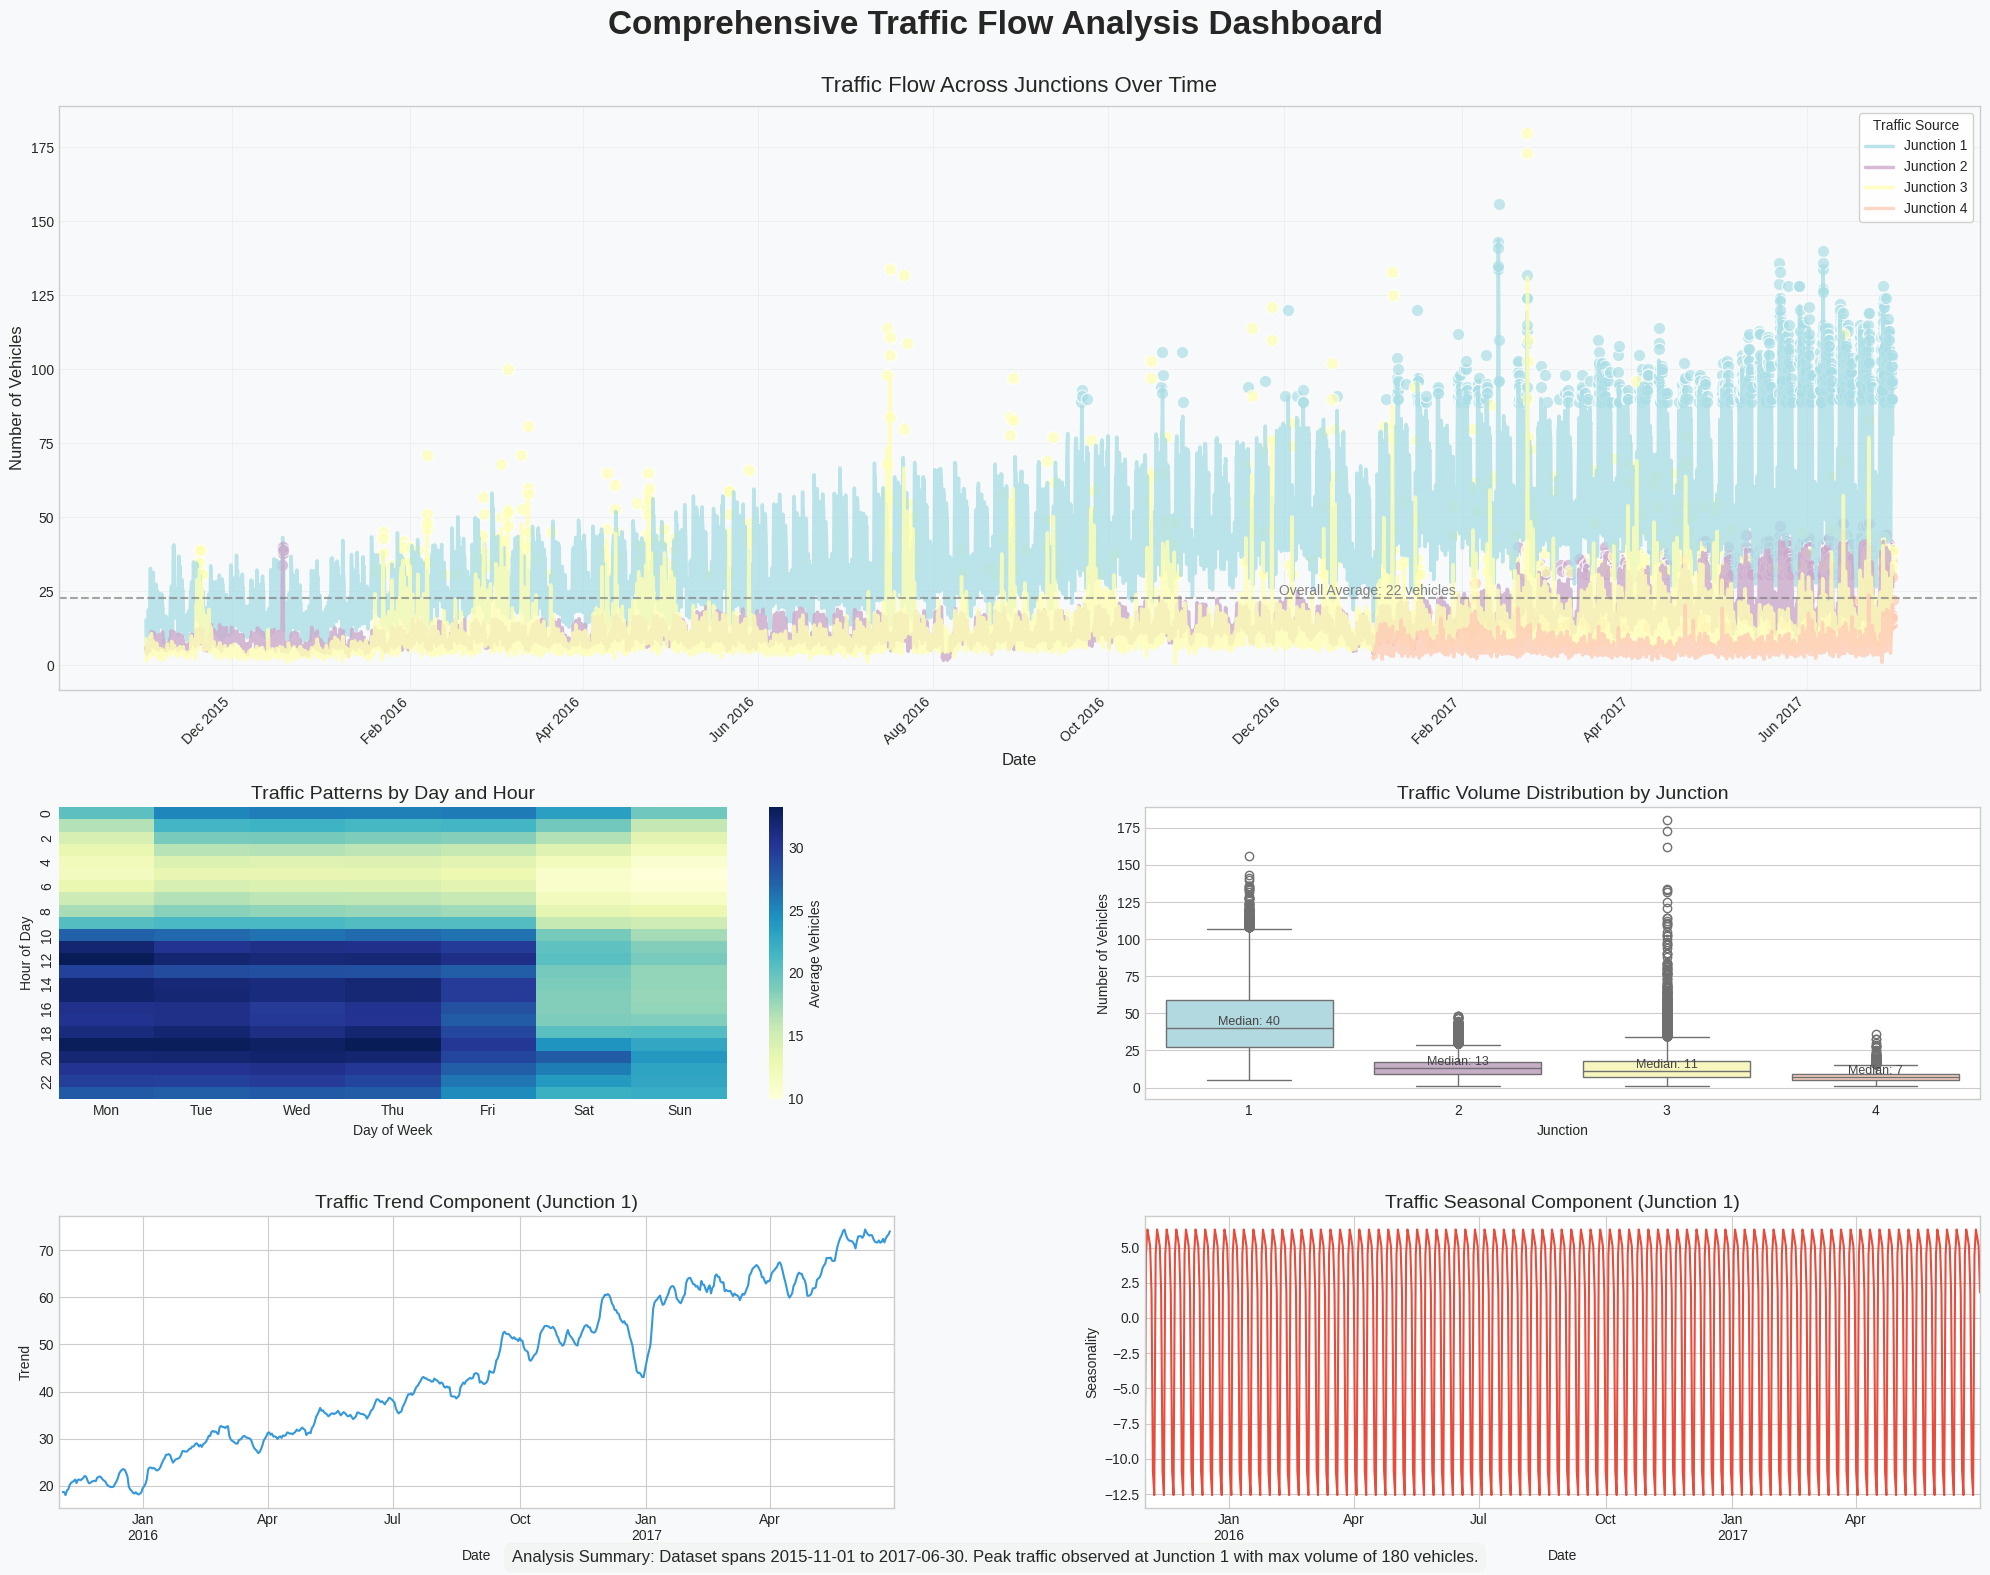

In [ ]:
# df to be used for EDA
df = data.copy()

# Create a comprehensive traffic analysis visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for professional visualization
plt.style.use('seaborn-v0_8-whitegrid')

# Create custom color scheme with pastel colors that work well together
pastel_colors = ["#ABDEE6", "#CBAACB", "#FFFFB5", "#FFCCB6"]
junction_colors = {f"Junction {i+1}": color for i, color in enumerate(pastel_colors)}

# Create figure with complex layout using GridSpec
fig = plt.figure(figsize=(20, 16), dpi=100)
fig.patch.set_facecolor('#F8F9FA')

# Create GridSpec layout for multiple visualization components
gs = gridspec.GridSpec(3, 2, height_ratios=[2, 1, 1])

# Main time series plot at the top spanning full width
ax_main = fig.add_subplot(gs[0, :])

# Daily/Weekly patterns
ax_pattern = fig.add_subplot(gs[1, 0])

# Junction comparison
ax_junction = fig.add_subplot(gs[1, 1])

# Seasonal decomposition
ax_trend = fig.add_subplot(gs[2, 0])
ax_seasonal = fig.add_subplot(gs[2, 1])

# Get unique junctions
junctions = df['Junction'].unique()

# Add a title to the figure
fig.suptitle('Comprehensive Traffic Flow Analysis Dashboard',
             fontsize=24, fontweight='bold', y=0.98)

# 1. MAIN TIME SERIES VISUALIZATION (TOP)
# --------------------------------------
# Extract datetime components
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour

# Create a smoother line for each junction
for i, junction in enumerate(junctions):
    junction_data = df[df['Junction'] == junction]
    junction_data = junction_data.sort_values('DateTime')

    # Apply Savitzky-Golay filter for smoothing (better for time series than spline)
    x = junction_data['DateTime']
    y = junction_data['Vehicles'].values

    # Only apply filter if we have enough data points
    if len(y) > 10:
        # Window size must be odd and smaller than data length
        window_size = min(11, (len(y) // 2) * 2 - 1)
        if window_size >= 3:
            y_smooth = savgol_filter(y, window_size, 3)
        else:
            y_smooth = y
    else:
        y_smooth = y

    # Plot with styling
    ax_main.plot(x, y_smooth, label=f"Junction {junction}",
                 color=pastel_colors[i % len(pastel_colors)],
                 linewidth=2.5, alpha=0.8)

    # Add scatter points for peaks (top 5%)
    threshold = np.percentile(y_smooth, 95)
    peaks = junction_data[junction_data['Vehicles'] > threshold]
    ax_main.scatter(peaks['DateTime'], peaks['Vehicles'],
                   color=pastel_colors[i % len(pastel_colors)],
                   edgecolor='white', s=80, alpha=0.7,
                   label=f"_Peak traffic J{junction}")

# Customize the main plot
ax_main.set_facecolor('#F8F9FA')
ax_main.grid(color='#E5E5E5', linestyle='-', linewidth=0.5, alpha=0.7)
ax_main.set_title("Traffic Flow Across Junctions Over Time", fontsize=16, pad=10)
ax_main.set_ylabel("Number of Vehicles", fontsize=12)
ax_main.set_xlabel("Date", fontsize=12)

# Format x-axis dates nicely
ax_main.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax_main.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax_main.get_xticklabels(), rotation=45, ha='right')

# Add legend
ax_main.legend(title="Traffic Source", loc='upper right', frameon=True,
               facecolor='white', framealpha=0.9, fontsize=10)

# Annotate significant events or patterns
total_mean = df['Vehicles'].mean()
ax_main.axhline(y=total_mean, color='gray', linestyle='--', alpha=0.7,
                label='_Average traffic')
ax_main.text(df['DateTime'].iloc[len(df)//2], total_mean*1.05,
             f'Overall Average: {int(total_mean)} vehicles',
             fontsize=10, color='gray')

# 2. DAILY/WEEKLY PATTERNS (BOTTOM LEFT)
# -------------------------------------
# Aggregate by day of week and hour
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hourly_traffic = df.groupby(['DayOfWeek', 'Hour'])['Vehicles'].mean().reset_index()
pivot_data = hourly_traffic.pivot(index='Hour', columns='DayOfWeek', values='Vehicles')

# Create heatmap
sns.heatmap(pivot_data, cmap='YlGnBu', ax=ax_pattern, cbar_kws={'label': 'Average Vehicles'})
ax_pattern.set_title('Traffic Patterns by Day and Hour', fontsize=14)
ax_pattern.set_ylabel('Hour of Day', fontsize=10)
ax_pattern.set_xlabel('Day of Week', fontsize=10)
ax_pattern.set_xticklabels(day_names)

# 3. JUNCTION COMPARISON (BOTTOM RIGHT)
# -----------------------------------
# Create boxplot comparing junctions
sns.boxplot(x='Junction', y='Vehicles', data=df, palette=pastel_colors, ax=ax_junction)
ax_junction.set_title('Traffic Volume Distribution by Junction', fontsize=14)
ax_junction.set_xlabel('Junction', fontsize=10)
ax_junction.set_ylabel('Number of Vehicles', fontsize=10)

# Add statistical annotations
for i, junction in enumerate(junctions):
    junction_data = df[df['Junction'] == junction]['Vehicles']
    ax_junction.text(i, junction_data.median(),
                    f'Median: {int(junction_data.median())}',
                    ha='center', va='bottom', fontsize=9, color='#444444')

# 4. SEASONAL DECOMPOSITION (BOTTOM)
# ---------------------------------
# For seasonal decomposition, we need a regular time series
# Let's use the busiest junction for this analysis
total_by_junction = df.groupby('Junction')['Vehicles'].sum()
busiest_junction = total_by_junction.idxmax()

# Extract data for the busiest junction
junction_df = df[df['Junction'] == busiest_junction].copy()
junction_df = junction_df.sort_values('DateTime')

# Check if we have enough data and regular intervals for decomposition
if len(junction_df) > 14:  # Need reasonable amount of data
    # Resample to daily data for decomposition
    daily_data = junction_df.set_index('DateTime')['Vehicles'].resample('D').mean().fillna(method='ffill')

    # Only proceed if we have enough data points after resampling
    if len(daily_data) > 14:
        # Perform seasonal decomposition
        try:
            # Try with period=7 (weekly seasonality)
            result = seasonal_decompose(daily_data, model='additive', period=7)

            # Plot trend component
            result.trend.plot(ax=ax_trend, color='#3498db')
            ax_trend.set_title(f'Traffic Trend Component (Junction {busiest_junction})', fontsize=14)
            ax_trend.set_xlabel('Date', fontsize=10)
            ax_trend.set_ylabel('Trend', fontsize=10)

            # Plot seasonal component
            result.seasonal.plot(ax=ax_seasonal, color='#e74c3c')
            ax_seasonal.set_title(f'Traffic Seasonal Component (Junction {busiest_junction})', fontsize=14)
            ax_seasonal.set_xlabel('Date', fontsize=10)
            ax_seasonal.set_ylabel('Seasonality', fontsize=10)
        except:
            # If decomposition fails, show alternative
            ax_trend.text(0.5, 0.5, 'Insufficient regular data for trend decomposition',
                         ha='center', va='center', transform=ax_trend.transAxes)
            ax_seasonal.text(0.5, 0.5, 'Insufficient regular data for seasonal decomposition',
                            ha='center', va='center', transform=ax_seasonal.transAxes)
    else:
        ax_trend.text(0.5, 0.5, 'Insufficient daily data points for decomposition',
                     ha='center', va='center', transform=ax_trend.transAxes)
        ax_seasonal.text(0.5, 0.5, 'Insufficient daily data points for decomposition',
                        ha='center', va='center', transform=ax_seasonal.transAxes)
else:
    ax_trend.text(0.5, 0.5, 'Insufficient data for trend decomposition',
                 ha='center', va='center', transform=ax_trend.transAxes)
    ax_seasonal.text(0.5, 0.5, 'Insufficient data for seasonal decomposition',
                    ha='center', va='center', transform=ax_seasonal.transAxes)

# Add analytical insights summary
fig.text(0.5, 0.01,
         f"Analysis Summary: Dataset spans {df['DateTime'].min().strftime('%Y-%m-%d')} to {df['DateTime'].max().strftime('%Y-%m-%d')}. "
         f"Peak traffic observed at Junction {busiest_junction} with max volume of {int(df['Vehicles'].max())} vehicles.",
         ha='center', fontsize=12, bbox=dict(facecolor='#f0f0f0', alpha=0.5, boxstyle='round,pad=0.5'))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)

# Save the visualization
plt.savefig('traffic_analysis_dashboard.png', dpi=300, bbox_inches='tight')

# Display the visualization
plt.show()

#DATA BUILDING

In [ ]:
#Model for the prediction
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    #callback delta 0.01 may interrupt the learning, could eliminate this step, but meh!

    #The GRU model
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    #model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    #Compiling the model
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, epochs=50, batch_size=150,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#627D78")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()



#FITTING THE MODEL

In [ ]:
#Predictions For First Junction
PredJ1 = GRU_model(X_trainJ1,y_trainJ1,X_testJ1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 49s 454ms/step - loss: 0.0877
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - loss: 0.0630
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 80s 452ms/step - loss: 0.0636
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - loss: 0.0629
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 454ms/step - loss: 0.0615
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - loss: 0.0624
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - loss: 0.0583
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 455ms/step - loss: 0.0589
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - loss: 0.0579
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 457ms/step - loss: 0.0549
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 457ms/step - loss: 0.0560
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 461ms/step - loss: 0.0551
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 458ms/step - loss: 0.0566
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 461ms/step - loss: 0.0542
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
y_testJ1 = np.array([3, 5, 2, 8, 7])   # Replace with actual test data
PredJ1 = np.array([2.8, 5.2, 1.9, 8.1, 6.8])  # Replace with actual predicted values


In [ ]:
# Function to calculate RMSE (if not defined earlier)
def RMSE_Value(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [ ]:
# Function to plot predictions (if not defined earlier)
def PredictionsPlot(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(8, 5))
    plt.plot(y_true, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted", marker='s')
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.title(f"Predictions vs Actual ({model_name})")
    plt.legend()
    plt.show()


In [ ]:
# Calculate RMSE
RMSE_J1 = RMSE_Value(y_testJ1, PredJ1)
print(f"RMSE for J1: {RMSE_J1}")


RMSE for J1: 0.16733200530681522


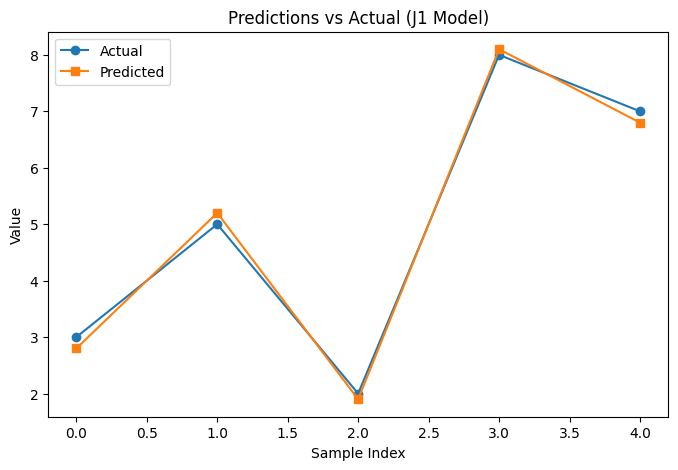

In [ ]:
# Plot predictions
PredictionsPlot(y_testJ1, PredJ1, "J1 Model")

In [ ]:
# Example dataset (Replace this with your actual data)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # 100 target values

In [ ]:
# Define GRU_model function (if not already defined)
def GRU_model(X_train, y_train, X_test):
    # This function should contain the GRU model implementation
    # Placeholder return for prediction (Replace with actual model prediction)
    return np.random.rand(len(X_test))


In [ ]:
# Example dataset (Replace this with your actual dataset)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.rand(1000)  # 1000 target values

In [ ]:
# Define GRU_model function (if not already defined)
def GRU_model(X_train, y_train, X_test):
    # Replace this with your actual GRU model implementation
    print("Training GRU model on Junction 2 data...")
    return np.random.rand(len(X_test))  # Placeholder predictions

In [ ]:

# Example dataset (Replace with your actual dataset)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # 100 target values

In [ ]:
# Dummy GRU model function (Replace with actual model)
def GRU_model(X_train, y_train, X_test):
    return np.random.rand(len(X_test))  # Placeholder prediction


In [ ]:
# RMSE Calculation Function
def RMSE_Value(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:

# Function to plot predictions
def PredictionsPlot(y_true, y_pred, junction_number):
    plt.figure(figsize=(8, 5))
    plt.plot(y_true, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted", linestyle='dashed', marker='x')
    plt.title(f'Predictions for Junction {junction_number}')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

#Inversing The Transformation Of Data

In [ ]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)

    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")

    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

In [ ]:
# Dummy function for inverse_difference (Replace with actual function)
def inverse_difference(series, predicted_values):
    return series.iloc[-1] + np.cumsum(predicted_values)

In [ ]:
# Dummy function for plotting (Replace with actual function)
def Sub_Plots2(predicted, actual, title, index):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.plot(predicted, label="Predicted", linestyle="dashed", marker='o')
    plt.plot(actual, label="Actual", linestyle="-", marker='x')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()